## Credit EDA Case Study

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as ply
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = 'iframe'
pio.templates.default = "plotly_dark"

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



### Explore Dataset

In [2]:
app_data =pd.read_csv("../input/credit-eda-case-study/application_data.csv");
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
app_data.shape # 122 Columns 

(307511, 122)

In [5]:
# Summary of numeric columns
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# Most of the columns are of type integer or float. 
app_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Data Cleaning

#### Dropping Columns with high percentage of NULL values

In [7]:
# Percentage of NULL Values in descending order 
(app_data.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [8]:
# Columns with NULL Values greater than 40%
s1= (app_data.isnull().mean()*100).sort_values(ascending=False)[app_data.isnull().mean()*100 > 40]
s1

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [9]:
fig= px.bar(data_frame=s1,
       x=s1.index.tolist(), 
       y=s1.values,
       color=s1.values, 
       text=s1.values.round()
      )
fig.update_traces(textposition='outside',marker_coloraxis=None)
fig.update_xaxes(title='Columns') 
fig.update_yaxes(title='Percentage')
fig.update_layout(
                    title=dict(text = "Null Value Percentage",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =600,
                  )
fig.show()

In [10]:
# Get Column names with NULL percentage greater than 40%
cols = (app_data.isnull().mean()*100 > 40)[app_data.isnull().mean()*100 > 40].index.tolist()
cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [11]:
# We are good to delete 49 columns because NULL percentage for these columns is greater than 40%
len(cols)

49

In [12]:
# Drop 49 columns
app_data.drop(columns=cols,inplace=True)

In [13]:
app_data.shape # 307511 rows & 73 Columns

(307511, 73)

In [14]:
# NULL Values percentage in new dataset
s2= (app_data.isnull().mean()*100).sort_values(ascending=False)
s2

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [15]:
s2.head(10)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

#### Imputation of Missing Values

In [16]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
'''  
Impute the missing values of below columns with mode
- AMT_REQ_CREDIT_BUREAU_MONTH
- AMT_REQ_CREDIT_BUREAU_WEEK 
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR 
- AMT_REQ_CREDIT_BUREAU_QRT
'''
for i in s2.head(10).index.to_list():
    if 'AMT_REQ_CREDIT' in i:
        print('Most frequent value in {0} is : {1}'.format(i,app_data[i].mode()[0]))
        print('Imputing the missing value with : {0}'.format(app_data[i].mode()[0]))
        app_data[i].fillna(app_data[i].mode()[0],inplace=True)
        print('NULL Values in {0} after imputation : {1}'.format(i,app_data[i].isnull().sum()))
        print()

Most frequent value in AMT_REQ_CREDIT_BUREAU_YEAR is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_YEAR after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_QRT is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_QRT after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_MON is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_MON after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_WEEK is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_WEEK after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_DAY is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_DAY after imputation : 0

Most frequent value in AMT_REQ_CREDIT_BUREAU_HOUR is : 0.0
Imputing the missing value with : 0.0
NULL Values in AMT_REQ_CREDIT_BUREAU_HOUR after imputation : 0



In [18]:
# Missing value percentage of remaining columns
(app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

__Impute missing values for OCCUPATION_TYPE__

In [19]:
# We can impute missing values in 'OCCUPATION_TYPE' column with 'Laborers'
fig=px.bar(app_data.OCCUPATION_TYPE.value_counts(),color=app_data.OCCUPATION_TYPE.value_counts()) 
fig.update_traces(textposition='outside',marker_coloraxis=None)
fig.update_xaxes(title='Occupation Type') 
fig.update_yaxes(title='Count')
fig.update_layout(
                    title=dict(text = "Occupation Type Frequency",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =450,
                  )
fig.show()

In [20]:
app_data.OCCUPATION_TYPE.fillna('Laborers',inplace=True)

__Impute Missing values (XNA) in CODE_GENDER with mode__

In [21]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [22]:
app_data['CODE_GENDER'].replace(to_replace='XNA',value=app_data['CODE_GENDER'].mode()[0],inplace=True) 

In [23]:
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

__Impute missing values for EXT_SOURCE_3__

In [24]:
app_data.EXT_SOURCE_3.dtype

dtype('float64')

In [25]:
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.median(),inplace=True)

In [26]:
# Percentage of missing values after imputation
(app_data.isnull().mean()*100).sort_values(ascending=False)

NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
                                 ...   
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
TARGET                         0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
Length: 73, dtype: float64

In [27]:
# Replace 'XNA' with NaN
app_data = app_data.replace('XNA',np.NaN)

__DELETE all flag columns__

In [28]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [29]:
# Flag Columns
col =[]
for i in app_data.columns:
    if 'FLAG' in i:
        col.append(i)
col 

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [30]:
# DELETE all flag columns as they won't be much useful in our analysis
app_data.drop(columns=col,inplace=True)
app_data.head()

#OR

#app_data= app_data[[i for i in  app_data.columns if 'FLAG' not in i]]     

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


__Impute Missing values for AMT_ANNUITY & AMT_GOODS_PRICE__

In [31]:
col=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for i in col:
    print('Null Values in {0} : {1}'.format(i,app_data[i].isnull().sum()))

Null Values in AMT_INCOME_TOTAL : 0
Null Values in AMT_CREDIT : 0
Null Values in AMT_ANNUITY : 12
Null Values in AMT_GOODS_PRICE : 278


In [32]:
app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].median(),inplace=True)
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median(),inplace=True)
app_data['AMT_ANNUITY'].isnull().sum()
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

#### Correcting Data

In [33]:
days = []
for i in app_data.columns:
    if 'DAYS' in i:
        days.append(i)
        print('Unique Values in {0} column : {1}'.format(i,app_data[i].unique()))
        print('NULL Values in {0} column : {1}'.format(i,app_data[i].isnull().sum()))
        print()

Unique Values in DAYS_BIRTH column : [ -9461 -16765 -19046 ...  -7951  -7857 -25061]
NULL Values in DAYS_BIRTH column : 0

Unique Values in DAYS_EMPLOYED column : [  -637  -1188   -225 ... -12971 -11084  -8694]
NULL Values in DAYS_EMPLOYED column : 0

Unique Values in DAYS_REGISTRATION column : [ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
NULL Values in DAYS_REGISTRATION column : 0

Unique Values in DAYS_ID_PUBLISH column : [-2120  -291 -2531 ... -6194 -5854 -6211]
NULL Values in DAYS_ID_PUBLISH column : 0

Unique Values in DAYS_LAST_PHONE_CHANGE column : [-1134.  -828.  -815. ... -3988. -3899. -3538.]
NULL Values in DAYS_LAST_PHONE_CHANGE column : 1



In [34]:
app_data[days]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [35]:
# Use absolute values in DAYS columns
app_data[days] = abs(app_data[days])
app_data[days]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


#### Binning

In [36]:
# Lets do binning of these variables 
for i in col:
    app_data[i+'_Range']=pd.qcut(app_data[i],q=5,labels=['Very Low' , 'Low', 'Medium' , 'High' , 'Very High'])
    print(app_data[i+'_Range'].value_counts())
    print()

Low          85756
High         75513
Very Low     63671
Very High    47118
Medium       35453
Name: AMT_INCOME_TOTAL_Range, dtype: int64

Very Low     64925
High         64024
Medium       61552
Very High    58912
Low          58098
Name: AMT_CREDIT_Range, dtype: int64

Medium       61569
Very Low     61507
Low          61499
Very High    61484
High         61452
Name: AMT_ANNUITY_Range, dtype: int64

Very Low     71454
Medium       61533
Very High    61430
High         61349
Low          51745
Name: AMT_GOODS_PRICE_Range, dtype: int64



In [37]:
app_data['YEARS_EMPLOYED']= app_data['DAYS_EMPLOYED']/365
app_data['Client_Age']= app_data['DAYS_BIRTH']/365

In [38]:
# Drop 'DAYS_EMPLOYED'& 'DAYS_BIRTH' column as we will be performing analysis on Year basis
app_data.drop(columns=['DAYS_EMPLOYED','DAYS_BIRTH'],inplace=True)

In [39]:
app_data['Age Group']=pd.cut(
                             x=app_data['Client_Age'],
                             bins=[0,20,30,40,50,60,100],
                             labels=['0-20','20-30','30-40','40-50','50-60','60-100']
                             )

In [40]:
app_data[['SK_ID_CURR','Client_Age','Age Group']]

,SK_ID_CURR,Client_Age,Age Group
0,100002,25.920548,20-30
1,100003,45.931507,40-50
2,100004,52.180822,50-60
3,100006,52.068493,50-60
4,100007,54.608219,50-60
...,...,...,...
307506,456251,25.553425,20-30
307507,456252,56.917808,50-60
307508,456253,41.002740,40-50
307509,456254,32.769863,30-40


In [41]:
app_data['Work Experience']=pd.cut(
                             x=app_data['YEARS_EMPLOYED'],
                             bins=[0,5,10,15,20,25,30,100],
                             labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-100']
                             )

In [42]:
app_data[['SK_ID_CURR','YEARS_EMPLOYED','Work Experience']]

,SK_ID_CURR,YEARS_EMPLOYED,Work Experience
0,100002,1.745205,0-5
1,100003,3.254795,0-5
2,100004,0.616438,0-5
3,100006,8.326027,5-10
4,100007,8.323288,5-10
...,...,...,...
307506,456251,0.646575,0-5
307507,456252,1000.665753,NaN
307508,456253,21.701370,20-25
307509,456254,13.112329,10-15


### Outlier Detection

#### Analyzing AMT column for Outliers

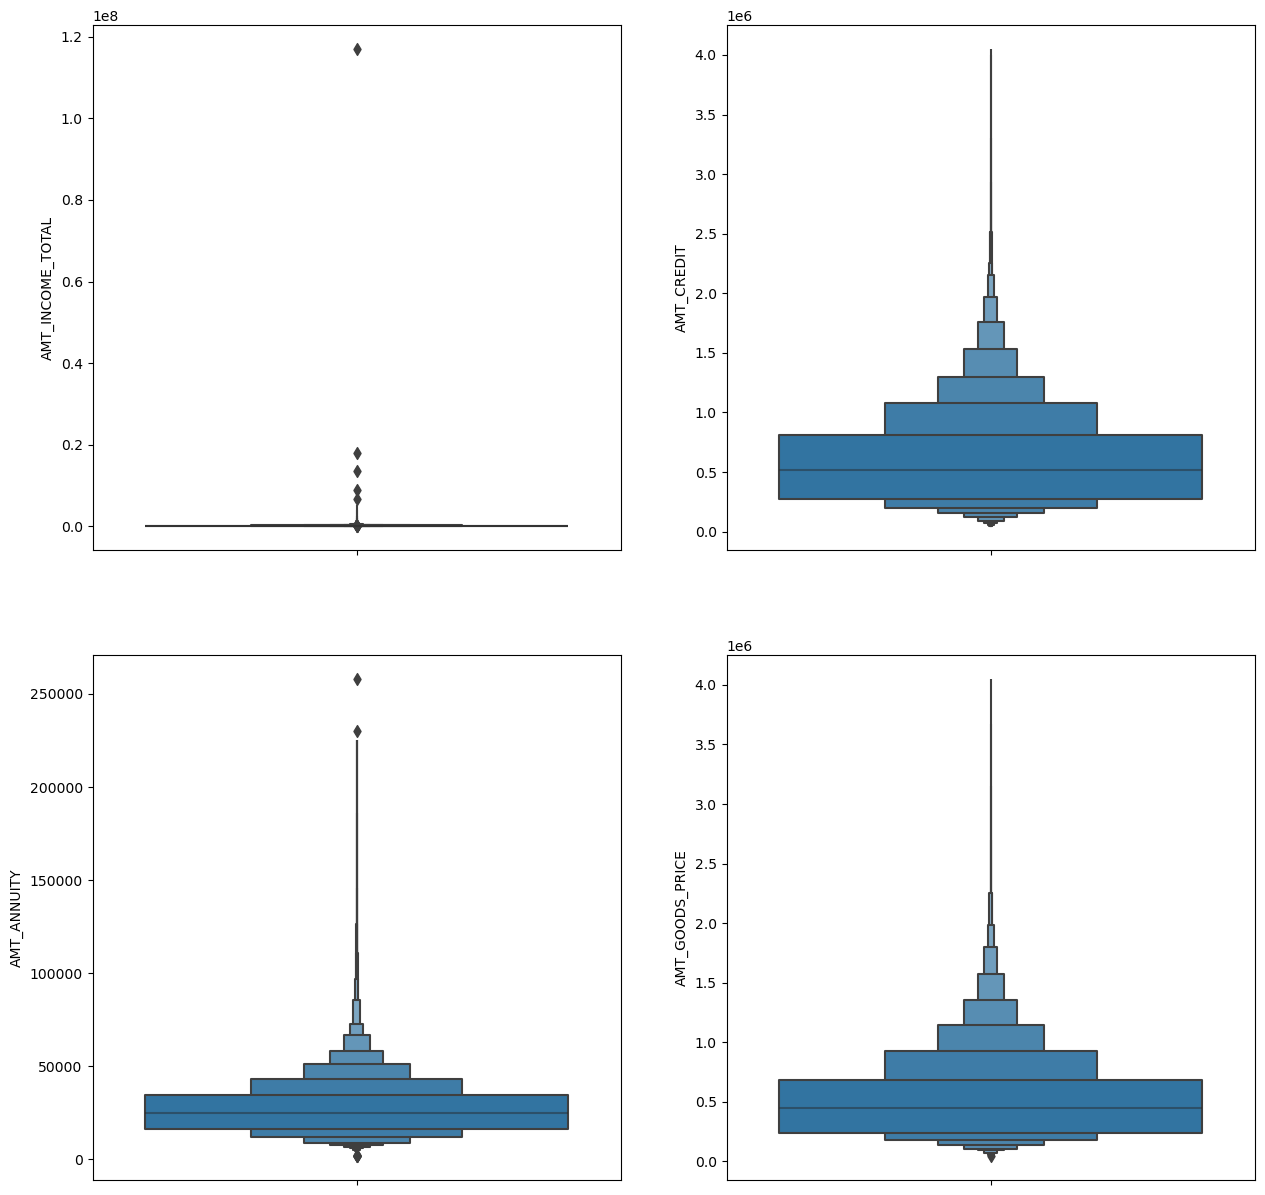

In [43]:
cols= ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
count=0
for i in range(0,2):
    for j in range(0,2):
        sns.boxenplot(y=app_data[cols[count]],ax=axes[i,j])
        count+=1
plt.show()

Below Columns have Outliers and those values can be dropped :-

- AMT_INCOME_TOTAL
- AMT_ANNUITY

In [44]:
#Remove Outlier for 'AMT_INCOME_TOTAL' column
app_data=app_data[app_data['AMT_INCOME_TOTAL']<app_data['AMT_INCOME_TOTAL'].max()]

#Remove Outlier for 'AMT_ANNUITY' column
app_data=app_data[app_data['AMT_ANNUITY']<app_data['AMT_ANNUITY'].max()]

#### Analysing CNT_CHILDREN column for Outliers

In [45]:
fig=px.box(app_data['CNT_CHILDREN'])
fig.update_layout(
                    title=dict(text = "Number of children",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    width =400,
                    height =400,
                  )
fig.show()

In [46]:
app_data['CNT_CHILDREN'].value_counts()

0     215371
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [47]:
app_data.shape[0]

307509

In [48]:
# Remove all data points where CNT_CHILDREN is greater than 10
app_data= app_data[app_data['CNT_CHILDREN']<=10]
app_data.shape[0] 

307501

Eight values dropped where number of children are greater than 10

#### Analysing YEARS_EMPLOYED column for Outliers

<AxesSubplot:ylabel='YEARS_EMPLOYED'>

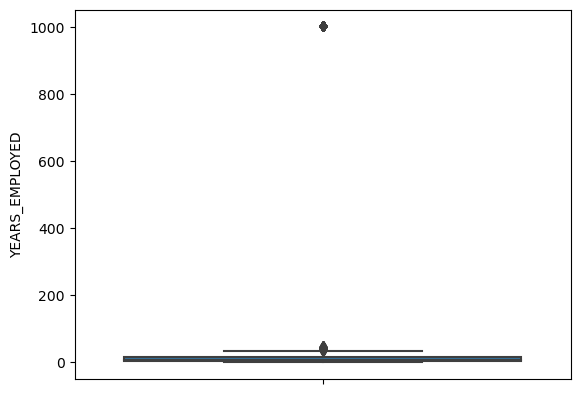

In [49]:
sns.boxplot(y=app_data['YEARS_EMPLOYED'])

In [50]:
app_data['YEARS_EMPLOYED'].value_counts()

1000.665753    55373
0.547945         156
0.613699         152
0.630137         151
0.545205         151
               ...  
38.249315          1
32.402740          1
27.879452          1
25.915068          1
23.819178          1
Name: YEARS_EMPLOYED, Length: 12574, dtype: int64

In [51]:
app_data.shape[0]

307501

In [52]:
app_data['YEARS_EMPLOYED'][app_data['YEARS_EMPLOYED']>1000]=np.NaN

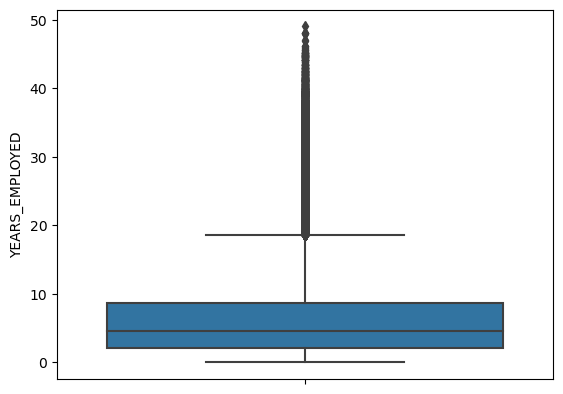

In [53]:
sns.boxplot(y=app_data['YEARS_EMPLOYED'])
plt.show()

In [54]:
app_data.isnull().sum().sort_values(ascending=False).head(10)

Work Experience             55375
ORGANIZATION_TYPE           55373
YEARS_EMPLOYED              55373
NAME_TYPE_SUITE              1292
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
EXT_SOURCE_2                  660
CNT_FAM_MEMBERS                 2
dtype: int64

#### Analyzing AMT_REQ_CREDIT columns for Outliers

In [55]:
cols = [i for i in  app_data.columns if 'AMT_REQ' in i]
cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

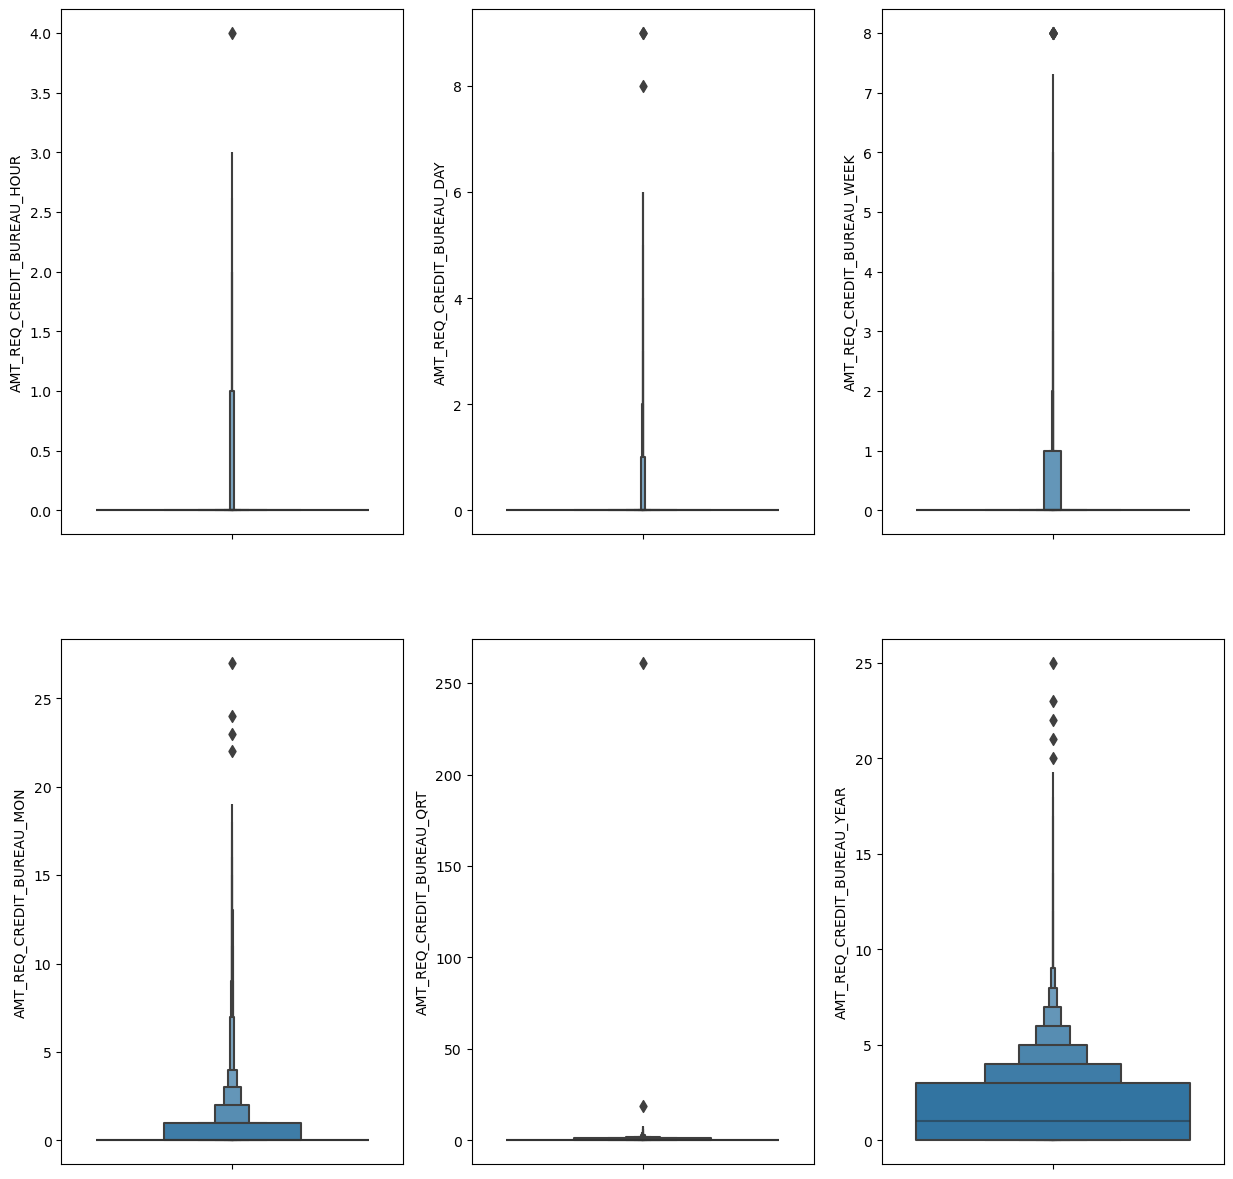

In [56]:
fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(15,15))
count=0
for i in range(0,2):
    for j in range(0,3):
        sns.boxenplot(y=app_data[cols[count]],ax=axes[i,j])
        count+=1
plt.show()

AMT_REQ_CREDIT_BUREAU_QRT contains an outlier

In [57]:
# Remove Outlier for AMT_REQ_CREDIT_BUREAU_QRT
app_data=app_data[app_data['AMT_REQ_CREDIT_BUREAU_QRT']<app_data['AMT_REQ_CREDIT_BUREAU_QRT'].max()]

### Univariate Analysis

In [58]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_

In [59]:
fig1=px.bar(app_data['OCCUPATION_TYPE'].value_counts(),color=app_data['OCCUPATION_TYPE'].value_counts())
fig1.update_traces(textposition='outside',marker_coloraxis=None)
fig1.update_xaxes(title='Occupation Type') 
fig1.update_yaxes(title='Count')
fig1.update_layout(
                    title=dict(text = "Occupation Type",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =450,
                  )
fig1.show()

In [60]:
fig2=px.bar(app_data['ORGANIZATION_TYPE'].value_counts(),color=app_data['ORGANIZATION_TYPE'].value_counts())
fig2.update_traces(textposition='outside',marker_coloraxis=None)
fig2.update_xaxes(title='Organization Type') 
fig2.update_yaxes(title='Count')
fig2.update_layout(
                        title=dict(text = "Organization Type",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height =450,
                  )
fig2.show()

__Insights__
- Most People who applied for Loan application are Laborers
- Most People who applied for Loan application belong to either __Business Entity Type3__ or __Self-Employed__ Organization Type.

In [61]:
cols = ['Age Group','NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','Work Experience']

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.13 
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=app_data[cols[count]].value_counts().index, 
                             y=app_data[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_data[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1600,
                  )
fig.show()

__Insights__

- Bank has recieved majority of the loan application from  __30-40__ & __40-50__ Age groups.


- More than __50%__ of clients who have applied for loan belong to __Working Income Type__.


- 88.7% clients with __Secondary/Secondary Special__ education type have applied for the loan.


- Married people tend to apply more for loans. __63.9%__ clients who are have applied for loan are married. 


- Majority of the Clients who have applied for the loan have their own __house/apartment__.  Around 88.7% clients are owning either a house or an apartment.


- __Female__ loan applications are more as compared to __males__. This may be because banks charge less rate of interest for females. 


- Clients with work experience between __0-5__ years have applied most for loan application.


- 90.5% Applicants have requested for Cash loans

In [62]:
app_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
CODE_GENDER                         2
NAME_CONTRACT_TYPE                  2
TARGET                              2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
AMT_CREDIT_Range                    5
AMT_INCOME_TOTAL_Range              5
AMT_REQ_CREDIT_BUREAU_HOUR          5
AMT_GOODS_PRICE_Range               5
NAME_EDUCATION_TYPE                 5
Age Group                           5
AMT_ANNUITY_Range                   5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
Work Experience                     7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_S

#### Checking Imbalance

In [63]:
app_data['TARGET'].value_counts(normalize=True)

0    0.919275
1    0.080725
Name: TARGET, dtype: float64

In [64]:
fig=px.pie(values=app_data['TARGET'].value_counts(normalize=True),
           names=app_data['TARGET'].value_counts(normalize=True).index,
           hole = 0.5
          ) 
fig.update_layout(
                    title=dict(text = "Target Imbalance",x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False
                  )
fig.show()

In [65]:
app_target0 = app_data.loc[app_data.TARGET == 0]
app_target1 = app_data.loc[app_data.TARGET == 1] 

In [66]:
app_target0.shape

(282677, 51)

In [67]:
app_target1.shape

(24823, 51)

In [68]:
cols = ['Age Group','NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE']

title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=title,
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        if j==1:
            fig.add_trace(go.Bar(x=app_target0[cols[count]].value_counts().index, 
                             y=app_target0[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        else:
            fig.add_trace(go.Bar(x=app_target1[cols[count]].value_counts().index, 
                             y=app_target1[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1 
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Payment/ Non-Payment Difficulties)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    height = 1600,
                  )
fig.show()

In [69]:
cols = ['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','Work Experience']

title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=title,
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        if j==1:
            fig.add_trace(go.Bar(x=app_target0[cols[count]].value_counts().index, 
                             y=app_target0[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        else:
            fig.add_trace(go.Bar(x=app_target1[cols[count]].value_counts().index, 
                             y=app_target1[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1 
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Payment/ Non-Payment Difficulties)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    height = 1600,
                  )
fig.show()

In [70]:
cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE' ,'AMT_INCOME_TOTAL_Range','AMT_CREDIT_Range']

title = [None]*(2*len(cols))
title[::2]=[i+' (Non-Payment Difficulties)' for i in cols]
title[1::2]=[i+' (Payment Difficulties)' for i in cols]

#Subplot initialization
fig = make_subplots(
                     rows=4, 
                     cols=2,
                     subplot_titles=title,
                   )
# Adding subplots
count=0
for i in range(1,5):
    for j in range(1,3):
        if j==1:
            fig.add_trace(go.Bar(x=app_target0[cols[count]].value_counts().index, 
                             y=app_target0[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target0[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        else:
            fig.add_trace(go.Bar(x=app_target1[cols[count]].value_counts().index, 
                             y=app_target1[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (app_target1[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1 
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Payment/ Non-Payment Difficulties)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    height = 1600,
                  )
fig.show()

### Bivariate  / Multivariate Analysis

In [71]:
# Group data by 'AMT_CREDIT_Range' & 'CODE_GENDER'
df1=app_data.groupby(by=['AMT_CREDIT_Range','CODE_GENDER']).count().reset_index()[['AMT_CREDIT_Range','CODE_GENDER','SK_ID_CURR']]
df1

,AMT_CREDIT_Range,CODE_GENDER,SK_ID_CURR
0,Very Low,F,44073
1,Very Low,M,20850
2,Low,F,38185
3,Low,M,19912
4,Medium,F,39807
5,Medium,M,21743
6,High,F,42360
7,High,M,21662
8,Very High,F,38019
9,Very High,M,20889


In [72]:
# Group data by 'AMT_INCOME_TOTAL_Range' & 'CODE_GENDER'
df2=app_data.groupby(by=['AMT_INCOME_TOTAL_Range','CODE_GENDER']).count().reset_index()[['AMT_INCOME_TOTAL_Range','CODE_GENDER','SK_ID_CURR']]
df2 

,AMT_INCOME_TOTAL_Range,CODE_GENDER,SK_ID_CURR
0,Very Low,F,51464
1,Very Low,M,12205
2,Low,F,59967
3,Low,M,25787
4,Medium,F,23184
5,Medium,M,12269
6,High,F,43441
7,High,M,32070
8,Very High,F,24388
9,Very High,M,22725


In [73]:
fig1=px.bar(data_frame=df1,
       x='AMT_CREDIT_Range',
       y='SK_ID_CURR',color='CODE_GENDER',
       barmode='group',
       text='SK_ID_CURR'
      )
fig1.update_traces(textposition='outside')
fig1.update_xaxes(title='Day') 
fig1.update_yaxes(title='Transaction count')
fig1.update_layout(
                    title=dict(text = "Loan Applications by Gender & Credit Range",x=0.5,y=0.95),
                    title_font_size=20,
                  )
fig1.show()


__Insights__

- Females are mostly applying for __Very Low__ credit loans.
- Males are applying for __Medium__ & __High__ credit loans.

In [74]:
fig2=px.bar(data_frame=df2,
       x='AMT_INCOME_TOTAL_Range',
       y='SK_ID_CURR',color='CODE_GENDER',
       barmode='group',
       text='SK_ID_CURR'
      )
fig2.update_traces(textposition='outside')
fig2.update_xaxes(title='Day') 
fig2.update_yaxes(title='Transaction count')
fig2.update_layout(
                    title=dict(text = "Loan Applications by Gender & Total Income Range",x=0.5,y=0.95),
                    title_font_size=20,
                  )
fig2.show()

__Insights__

- Females with __Low__ & __Very Low__ total income have applied the most for the loan.

__Education Type VS Credit Amount (Payment / Non Payment Difficulties)__

In [75]:
fig = px.box(app_target0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Education Type VS Credit Amount (Non Payment Difficulties)")
fig.show()

In [76]:
fig = px.box(app_target1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Education Type VS Credit Amount (Payment Difficulties)")
fig.show()

__Income VS Credit Amount (Payment / Non Payment Difficulties)__ 

In [77]:
fig = px.box(app_target0, x="AMT_INCOME_TOTAL_Range", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Income Range VS Credit Amount (Non-Payment Difficulties)")
fig.show()

In [78]:
fig = px.box(app_target1, x="AMT_INCOME_TOTAL_Range", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Income Range VS Credit Amount (Payment Difficulties)")
fig.show()

__Age Group VS Credit Amount (Payment / Non Payment Difficulties)__ 

In [79]:
fig = px.box(app_target0, x="Age Group", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Age Group VS Credit Amount (Non-Payment Difficulties)")
fig.show()

In [80]:
fig = px.box(app_target1, x="Age Group", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Age Group VS Credit Amount (Payment Difficulties)")
fig.show()

__Work Experience VS Credit Amount (Payment / Non Payment Difficulties)__ 

In [81]:
fig = px.box(app_target0, x="Work Experience", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Work Experience VS Credit Amount (Non-Payment Difficulties)")
fig.show()

In [82]:
fig = px.box(app_target1, x="Work Experience", y="AMT_CREDIT", color='NAME_FAMILY_STATUS', 
             title="Work Experience VS Credit Amount (Payment Difficulties)")
fig.show()

__Numerical vs Numerical Variables__

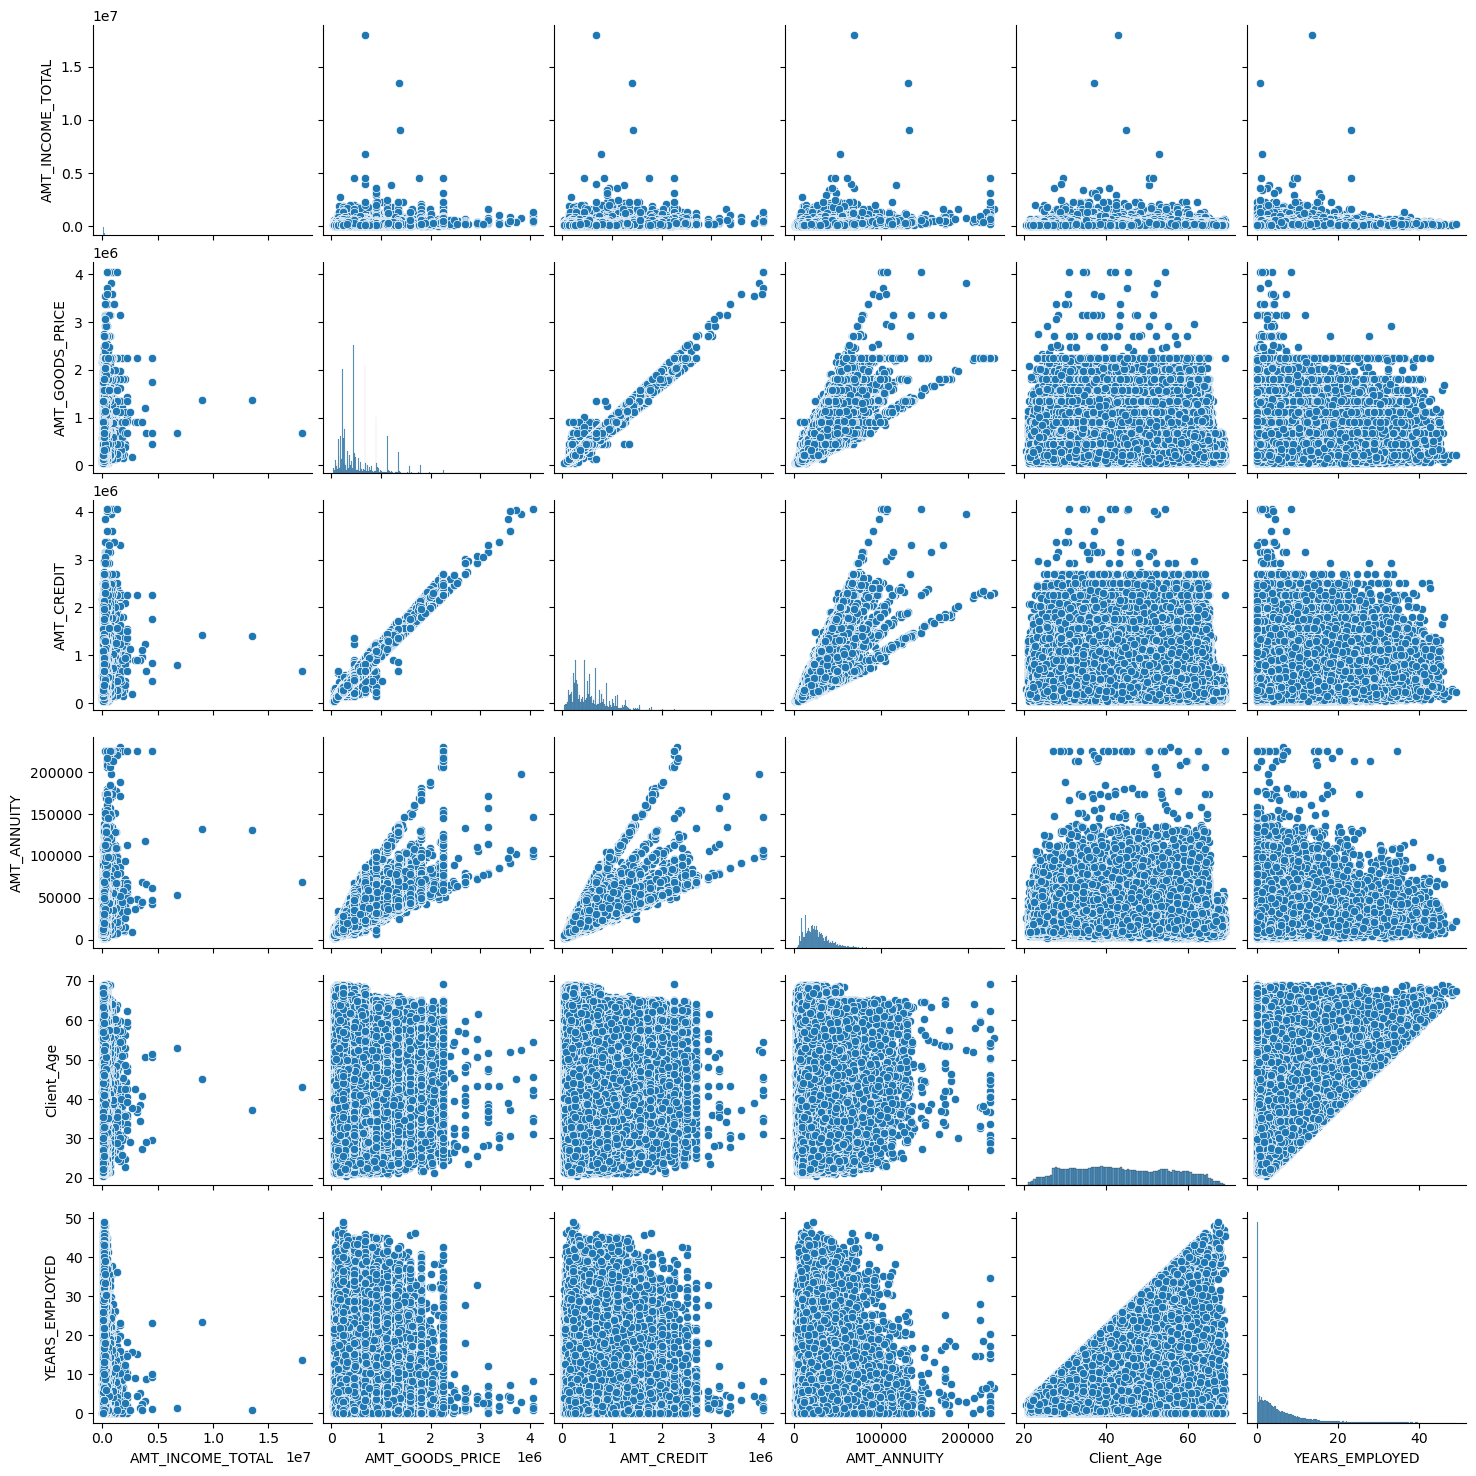

In [83]:
sns.pairplot(app_data[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Client_Age','YEARS_EMPLOYED' ]].fillna(0))
plt.show()

__Correlation in target0 & target1__

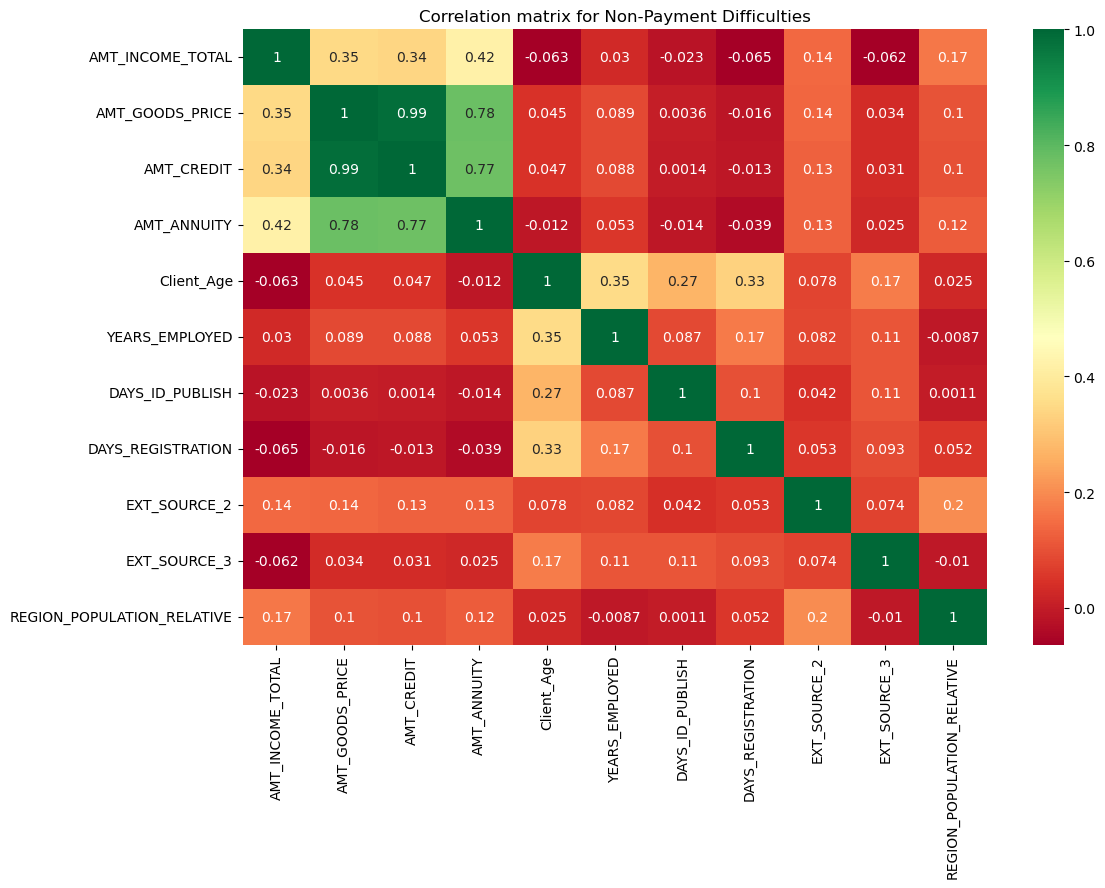

In [84]:
plt.figure(figsize=(12,8)) 
sns.heatmap(app_target0[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Client_Age','YEARS_EMPLOYED' ,
                       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                       'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation matrix for Non-Payment Difficulties')
plt.show()

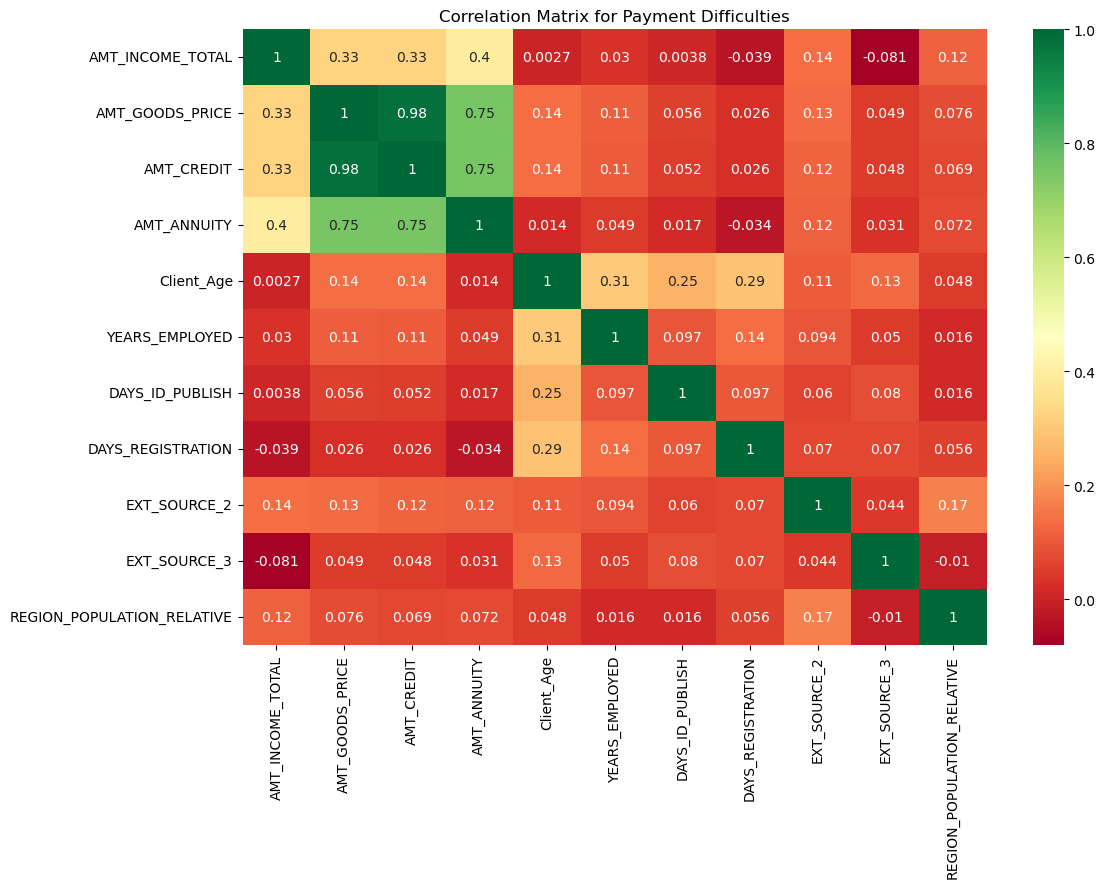

In [85]:
plt.figure(figsize=(12,8)) 
sns.heatmap(app_target1[['AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 
                       'AMT_CREDIT', 'AMT_ANNUITY',
                       'Client_Age','YEARS_EMPLOYED' ,
                       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION',
                       'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix for Payment Difficulties')
plt.show()

### Data Analysis on Previous Application dataset

In [86]:
appdata_previous = pd.read_csv("../input/credit-eda-case-study/previous_application.csv");
appdata_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


__Drop Columns with NULL Values greater than 40%__

In [87]:
s1= (appdata_previous.isnull().mean()*100).sort_values(ascending=False)[appdata_previous.isnull().mean()*100 > 40]
s1

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
dtype: float64

In [88]:
appdata_previous.shape

(1670214, 37)

In [89]:
appdata_previous.drop(columns = s1.index,inplace=True)

In [90]:
appdata_previous.shape

(1670214, 26)

__Changing negative values in the DAYS columns to positive values__

In [91]:
days = []
for i in appdata_previous.columns:
    if 'DAYS' in i:
        days.append(i)
        print('Unique Values in {0} column : {1}'.format(i,appdata_previous[i].unique()))
        print()

Unique Values in DAYS_DECISION column : [  -73  -164  -301 ... -1967 -2389    -1]



In [92]:
appdata_previous[days]= abs(appdata_previous[days])

In [93]:
appdata_previous[days]

,DAYS_DECISION
0,73
1,164
2,301
3,512
4,781
...,...
1670209,544
1670210,1694
1670211,1488
1670212,1185


In [94]:
# Replcae XNA and XAP are replaced by NaN
appdata_previous=appdata_previous.replace('XNA', np.NaN)
appdata_previous=appdata_previous.replace('XAP', np.NaN)

__Univariate Analysis on Previous Application Data__

In [95]:
appdata_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [96]:
cols = ['NAME_CONTRACT_STATUS','WEEKDAY_APPR_PROCESS_START', 
        'NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 
        'NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE']

#Subplot initialization
fig = make_subplots(
                     rows=3, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.17 
                   )
# Adding subplots
count=0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=appdata_previous[cols[count]].value_counts().index, 
                             y=appdata_previous[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (appdata_previous[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1200,
                  )
fig.show()

#### Approved Loans

In [97]:
approved=appdata_previous[appdata_previous['NAME_CONTRACT_STATUS']=='Approved']

In [98]:
cols = ['NAME_PORTFOLIO','NAME_GOODS_CATEGORY',
        'CHANNEL_TYPE','NAME_YIELD_GROUP' , 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE']

#Subplot initialization
fig = make_subplots(
                     rows=3, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.19 
                   )
# Adding subplots
count=0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=approved[cols[count]].value_counts().index, 
                             y=approved[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (approved[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1400,
                  )
fig.show()

#### Refused Loans

In [99]:
refused=appdata_previous[appdata_previous['NAME_CONTRACT_STATUS']=='Refused']

In [100]:
cols = ['NAME_PORTFOLIO','NAME_GOODS_CATEGORY',
        'CHANNEL_TYPE','NAME_YIELD_GROUP' , 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE']

#Subplot initialization
fig = make_subplots(
                     rows=3, 
                     cols=2,
                     subplot_titles=cols,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.19 
                   )
# Adding subplots
count=0
for i in range(1,4):
    for j in range(1,3):
        fig.add_trace(go.Bar(x=refused[cols[count]].value_counts().index, 
                             y=refused[cols[count]].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (refused[cols[count]].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
        count+=1
fig.update_layout(
                    title=dict(text = "Analyze Categorical variables (Frequency / Percentage)",x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 1400,
                  )
fig.show()

## Merging Application & Previous Application Data

In [101]:
appdata_merge = app_data.merge(appdata_previous,on='SK_ID_CURR', how='inner')
appdata_merge.shape

(1413670, 76)

__Analysis of Merged Data__

In [102]:
# Function for multiple plotting - Bar Chart
def plot_merge(appdata_merge,column_name):
    col_value = ['Refused','Approved', 'Canceled' , 'Unused offer']
    
    #Subplot initialization
    fig = make_subplots(
                     rows=2, 
                     cols=2,
                     subplot_titles=col_value,
                     horizontal_spacing=0.1,
                     vertical_spacing=0.3
                   )
    # Adding subplots
    count=0
    for i in range(1,3):
        for j in range(1,3):
            fig.add_trace(go.Bar(x=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts().index, 
                             y=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(),
                             name=cols[count],
                             textposition='auto',
                             text= [str(i) + '%' for i in (appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(normalize=True)*100).round(1).tolist()],
                            ),
                      row=i,col=j)
            count+=1
    fig.update_layout(
                    title=dict(text = "NAME_CONTRACT_STATUS VS "+column_name,x=0.5,y=0.99),
                    title_font_size=20,
                    showlegend=False,
                    width = 960,
                    height = 960,
                  )
    fig.show()

In [103]:
# Function for multiple plotting - Pie Chart
def plot_pie_merge(appdata_merge,column_name):
    col_value = ['Refused','Approved', 'Canceled' , 'Unused offer']
    
    #Subplot initialization
    fig = make_subplots(
                     rows=2, 
                     cols=2,
                     subplot_titles=col_value,
                     specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}]],
                   )
    # Adding subplots
    count=0
    for i in range(1,3):
        for j in range(1,3):
            fig.add_trace(go.Pie(labels=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts().index, 
                             values=appdata_merge[appdata_merge['NAME_CONTRACT_STATUS']==col_value[count]][column_name].value_counts(),
                             textinfo='percent',
                             insidetextorientation='auto',
                             hole=.3
                            ),
                      row=i,col=j)
            count+=1
    fig.update_layout(
                    title=dict(text = "NAME_CONTRACT_STATUS VS "+column_name,x=0.5,y=0.99),
                    title_font_size=20,
                    width = 960,
                    height = 960,
                  )
    fig.show()

In [104]:
plot_pie_merge(appdata_merge,'NAME_CONTRACT_TYPE_y')

__Insights__

- Banks mostly approve Consumer Loans
- Most of the __Refused_ & __Cancelled__ loans are __cash loans__.

In [105]:
plot_pie_merge(appdata_merge,'NAME_CLIENT_TYPE')

__Insights__

- Most of the approved , refused & canceled loans belong to the old clients.
- Almost __27.4%__ loans were provided to new customers.

In [106]:
plot_pie_merge(appdata_merge,'CODE_GENDER')

__Insights__

- Approved percentage of loans provided to females is more as compared to refused percentage.

In [107]:
plot_merge(appdata_merge,'NAME_EDUCATION_TYPE')

__Insights__

- Most of the approved loans belong to applicants with __Secondary / Secondary Special__ education type.

In [108]:
plot_merge(appdata_merge,'NAME_INCOME_TYPE')

__Insights__

- Across all Contract Status (Approved , Refused , Canceled , Unused Offer) people with __Working__ income type are leading. So it is quite evident that majority of the loans are coming from this income type class.

In [109]:
plot_pie_merge(appdata_merge,'NAME_FAMILY_STATUS')

__Insights__

- Approved percentage of loans for married applicants is higher than the rest of the contract status (refused , canceled etc.).

In [110]:
plot_pie_merge(appdata_merge,'NAME_PORTFOLIO')

__Insights__

- 60.6% previous approved loans belong to __POS__ name portfolio.
- Majority of the loans refused were cash loans.
- 93.4% loans that belong to __POS__ were canceled 

In [111]:
plot_merge(appdata_merge,'OCCUPATION_TYPE')

In [112]:
plot_merge(appdata_merge,'NAME_GOODS_CATEGORY')

In [113]:
plot_merge(appdata_merge,'PRODUCT_COMBINATION')

__Insights__

- Most of the approved loans belong to __POS hosehold with interest__ & __POS mobile with interest__ product combination.

- 15% refused loans belong to __Cash X-Sell: low__ product combination.

- Most of the canceled loans belong to __Cash__ category.

- 81.3% __Unused Offer__ loans belong to POS mobile with interest.

In [114]:
plot_merge(appdata_merge,'NAME_PAYMENT_TYPE')

In [115]:
plot_merge(appdata_merge,'CHANNEL_TYPE')

__Insights__

- Most of the approved loans belong to either __Country-wide__ or __Credit & cash offices__ channel type.

- More than 50% refused loans belong to  __Credit & cash offices__ channel type.

- __Credit & cash offices__ channel type loans are getting canceled the most.

- More than 90% __Unused Offer__ loans belong to Country-wide channel type.


In [116]:
plot_pie_merge(appdata_merge,'NAME_YIELD_GROUP')

__Insights__

- Most of the approved loans have medium grouped interest rate.

- Loans with low or normal interest rate are getting refused or canceled the most.

In [117]:
plot_pie_merge(appdata_merge,'NAME_HOUSING_TYPE')

In [118]:
plot_merge(appdata_merge,'Age Group')

In [119]:
plot_merge(appdata_merge,'Work Experience')

In [120]:
plot_merge(appdata_merge,'AMT_CREDIT_Range')

__Insights__

- Most of the approved loans belong to __Very Low__ & __High__ Credit range.

- __Medium & Very Low__ credit range loans are canceled and rejected the most.

In [121]:
plot_merge(appdata_merge,'AMT_INCOME_TOTAL_Range')

__Insights__

- Most of the loans are getting approved for Applicants with __Low__ Income range. May be they are opting for low credit loans.

- Almost 28% loan applications are either getting rejected or canceled even though applicant belong to HIGH Income range. May be they have requested for quite HIGH credit range.

# END